In [2]:
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Daten einlesen
Es gibt über 20 verschiedene Formate, die Pandas einlesen kann. Darunter CSV, Excel, JSON, SQL, usw.
Die Parameter sind abhängig vom gewählten Format.

In [2]:
data = pd.read_csv("mobilfunkdaten.csv", sep=";", header=0)

In [3]:
data

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.64,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.52,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.02,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,18,0,37,7,10310,95,5,45,4,2,1,45,272.625,0
1424,10,0,37,0,5693,100,30,27,2,1,1,25,395.685,1
1425,0,0,35,0,2715,24,4,17,3,1,1,30,125.56,0
1426,6,1,36,0,2865,43,13,19,2,1,2,25,189.36,1


Wir haben die Daten hier im sogenannten Breitformat vorliegen. Das bedeutet, dass wir für jedes einzelne Attribut eine eigene Spalte haben. Das Gegenstück dazu, ist das sogenannte Langformat, welches so aussieht:

        variable            value
index
0       Call Failure        8
0       Complains           0
0       Subscription Length 38
0       Charge Amount       0
...     ...                 ...
0       Churn               0
1       Call Failure        0
1       Complains           0

Mit data.info() können wir uns den Spaltenindex, die Spaltenbezeichnung, die Anzahl der nicht-null Werte und den Datentyp anzeigen lassen. Auch sehen wir die Größe des Datenframes.

Bei 2D sprechen wir bei Pandas von Dataframes. Bei 1D von einer Series.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Call Failure             1428 non-null   int64 
 1   Complains                1428 non-null   int64 
 2   Subscription Length      1428 non-null   int64 
 3   Charge Amount            1428 non-null   int64 
 4   Seconds of Use           1428 non-null   int64 
 5   Frequency of use         1428 non-null   int64 
 6   Frequency of SMS         1428 non-null   int64 
 7   Distinct Called Numbers  1428 non-null   int64 
 8   Age Group                1428 non-null   int64 
 9   Tariff Plan              1428 non-null   int64 
 10  Status                   1428 non-null   int64 
 11  Age                      1428 non-null   int64 
 12  Customer Value           1428 non-null   object
 13  Churn                    1428 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 15

Ein paar Befehle (Gerade für PyCharm Benutzer von Vorteil)

In [5]:
data.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.64,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.52,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.02,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [6]:
data.tail()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
1423,18,0,37,7,10310,95,5,45,4,2,1,45,272.625,0
1424,10,0,37,0,5693,100,30,27,2,1,1,25,395.685,1
1425,0,0,35,0,2715,24,4,17,3,1,1,30,125.56,0
1426,6,1,36,0,2865,43,13,19,2,1,2,25,189.36,1
1427,6,1,37,0,2143,46,38,34,3,1,2,30,239.56,1


In [7]:
data.shape

(1428, 14)

Um Zugriff auf die Spaltenbezeichnungen zu bekommen:

In [8]:
data.columns

Index(['Call Failure', 'Complains', 'Subscription Length', 'Charge Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

Um Zugriff auf ausschließlich die Werte zu bekommen:

In [9]:
data.values

array([[8, 0, 38, ..., 30, '197.64', 0],
       [0, 0, 39, ..., 25, '46.035', 0],
       [10, 0, 37, ..., 30, '1536.52', 0],
       ...,
       [0, 0, 35, ..., 30, '125.56', 0],
       [6, 1, 36, ..., 25, '189.36', 1],
       [6, 1, 37, ..., 30, '239.56', 1]], dtype=object)

Um auf eine einzelne Spalte zuzugreifen, verwendet man den jeweiligen Spaltennamen:

In [10]:
data["Seconds of Use"]

0        4370
1         318
2        2453
3        4198
4        2393
        ...  
1423    10310
1424     5693
1425     2715
1426     2865
1427     2143
Name: Seconds of Use, Length: 1428, dtype: int64

Für den Zugriff auf mehrere Spalten, benötigt man verschachtelte [[]] und trägt in diese die Spaltennamen ein:

In [11]:
data[["Complains", "Seconds of Use"]]

,Complains,Seconds of Use
0,0,4370
1,0,318
2,0,2453
3,0,4198
4,0,2393
...,...,...
1423,0,10310
1424,0,5693
1425,0,2715
1426,1,2865


Um ein Unterset nur mit bestimmten Daten zu erstellen, kann man einfach eine Initialisierung mit .copy()!!! erstellen:

In [12]:
subset = data[["Complains", "Seconds of Use"]].copy()
subset

,Complains,Seconds of Use
0,0,4370
1,0,318
2,0,2453
3,0,4198
4,0,2393
...,...,...
1423,0,10310
1424,0,5693
1425,0,2715
1426,1,2865


Wir können Elemente auch auf Wahrheitsgehalt überprüfen:

In [13]:
data["Seconds of Use"] > 15_000

0       False
1       False
2       False
3       False
4       False
        ...  
1423    False
1424    False
1425    False
1426    False
1427    False
Name: Seconds of Use, Length: 1428, dtype: bool

Oder auch Fancy Indexing zum subsetten verwenden:

In [14]:
data[data["Seconds of Use"] > 15_000]

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
12,25,0,38,3,15140,225,54,32,3,1,1,30,830.6,0
14,9,0,37,0,15485,182,150,30,2,1,1,25,1.380.015,0
33,25,0,31,3,16075,238,0,80,2,2,1,25,734.085,0
62,28,0,40,4,15200,228,59,34,3,1,1,30,853.12,0
64,12,0,39,1,15545,185,155,32,2,1,1,25,1405.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,9,0,41,0,15440,186,158,34,2,1,1,25,1414.17,0
1333,25,0,35,3,16030,242,8,84,2,1,1,25,768.24,0
1383,15,0,23,1,15510,222,0,72,2,1,1,25,707.94,0
1412,22,0,39,2,15015,227,58,35,3,1,1,30,841.68,0


Auch gibt es die Möglichkeit mit mehreren Bedingungen Subsets von Daten zu erstellen. Dazu fasst man die Fancy Indexes in () zusammen und verknüpft diese mit &:

In [15]:
data[(data["Complains"] >= 1) & (data["Frequency of SMS"] >= 100)]

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
84,9,1,36,4,7025,119,276,35,3,2,1,30,1389.76,0
184,7,1,38,4,7045,118,281,37,2,2,1,25,1.586.835,0
284,11,1,40,4,7225,126,286,39,3,2,1,30,1438.04,0
388,6,1,30,1,1495,44,204,16,2,2,1,25,987.255,1
688,6,1,27,1,1505,37,202,14,2,2,1,25,978.39,1
838,6,1,32,2,1315,42,201,12,3,2,1,30,858.28,1
884,12,1,35,4,7675,127,279,33,3,2,1,30,1428.08,0
988,4,1,27,1,1315,36,193,11,2,2,1,25,929.295,1
1088,0,1,25,0,1010,30,186,9,2,2,1,25,883.8,1
1138,2,1,27,1,1070,33,191,11,2,2,1,25,909.135,0


Dasselbe funktioniert auch mit dem ODER Operator |

In [16]:
data[(data["Complains"] >= 1) | (data["Frequency of SMS"] >= 100)]

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.52,0
6,4,0,38,0,2360,39,285,18,3,1,1,30,1235.96,0
7,13,0,37,2,9115,121,144,43,3,1,1,30,945.44,0
13,4,0,38,1,3095,27,483,8,3,1,1,30,2056.88,0
14,9,0,37,0,15485,182,150,30,2,1,1,25,1.380.015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1419,0,0,38,0,7383,129,388,46,2,1,1,25,2084.04,0
1421,5,0,38,0,6593,77,112,40,2,1,1,25,804.15,0
1422,20,1,34,0,830,49,20,20,2,1,2,25,129.555,1
1426,6,1,36,0,2865,43,13,19,2,1,2,25,189.36,1


Alternativ:

In [17]:
beschwerden = data["Complains"] >= 1
sms_nutzung = data["Frequency of SMS"] >= 100
data[beschwerden & sms_nutzung]

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
84,9,1,36,4,7025,119,276,35,3,2,1,30,1389.76,0
184,7,1,38,4,7045,118,281,37,2,2,1,25,1.586.835,0
284,11,1,40,4,7225,126,286,39,3,2,1,30,1438.04,0
388,6,1,30,1,1495,44,204,16,2,2,1,25,987.255,1
688,6,1,27,1,1505,37,202,14,2,2,1,25,978.39,1
838,6,1,32,2,1315,42,201,12,3,2,1,30,858.28,1
884,12,1,35,4,7675,127,279,33,3,2,1,30,1428.08,0
988,4,1,27,1,1315,36,193,11,2,2,1,25,929.295,1
1088,0,1,25,0,1010,30,186,9,2,2,1,25,883.8,1
1138,2,1,27,1,1070,33,191,11,2,2,1,25,909.135,0


Um Werte zu sortieren, nimmt man die Funktion .sort_values und gibt die Spalte an, nach welcher man sortieren möchte. Möchte man Absteigend sortieren, setzt man den Parameter "ascending" auf FALSE. Randnotiz: Man kann sogar den Sortieralgorithmus mithilfe des Parameters "kind" bestimmen. Zur Auswahl stehen: 'quicksort', 'mergesort', 'heapsort', 'stable'. (Just for Fun. Wird nur bei sehr großen Datenmengen interessant)

In [18]:
data.sort_values("Complains")

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.64,0
937,0,0,35,0,2070,42,150,23,2,1,1,25,770.04,0
936,0,0,34,0,955,33,13,20,3,1,2,30,91.52,0
935,0,0,35,0,3008,71,0,28,2,1,1,25,138.555,0
934,0,0,33,2,6255,105,246,33,2,2,1,25,1393.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,1,1,40,0,708,9,19,8,4,1,2,45,65.425,1
177,10,1,40,0,2348,46,44,35,3,1,2,30,271.76,1
173,22,1,40,9,10515,95,11,46,5,1,1,55,175.65,0
1326,9,1,39,0,2945,45,17,20,3,1,2,30,187.6,1


Es gibt auch die Möglichkeit nach mehreren Werten zu sortieren. Dazu übergibt man einfach eine Liste mit [] an die Sortierfunktion. Dabei wird immer von links nach rechts sortiert.

In [19]:
data.sort_values(["Complains", "Subscription Length"], ascending=False)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
261,14,1,44,0,2498,64,23,23,3,1,2,30,194.48,0
151,1,1,43,0,398,7,17,8,3,1,2,30,84.2,1
811,11,1,43,0,2238,60,16,18,3,1,2,30,155.92,0
277,14,1,42,0,2528,54,49,37,4,1,2,45,187.05,1
1311,9,1,42,0,2193,58,16,21,3,1,2,30,154.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,0,0,3,0,4130,30,200,4,3,1,1,30,966.4,0
1298,0,0,3,0,4005,32,198,4,3,1,1,30,953.48,0
1299,0,0,3,0,1103,11,0,1,2,1,1,25,50.13,1
1398,0,0,3,0,3825,24,193,2,2,1,1,25,1.041.705,0


Das Gleiche mit 3 Spalten, aber mit mehreren Argumenten im ascending Parameter.

In [20]:
data.sort_values(["Complains", "Subscription Length", "Seconds of Use"], ascending=[False, False, True])

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
261,14,1,44,0,2498,64,23,23,3,1,2,30,194.48,0
151,1,1,43,0,398,7,17,8,3,1,2,30,84.2,1
811,11,1,43,0,2238,60,16,18,3,1,2,30,155.92,0
1311,9,1,42,0,2193,58,16,21,3,1,2,30,154.04,0
277,14,1,42,0,2528,54,49,37,4,1,2,45,187.05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,0,0,3,0,0,0,0,0,2,1,1,25,0,1
1299,0,0,3,0,1103,11,0,1,2,1,1,25,50.13,1
1398,0,0,3,0,3825,24,193,2,2,1,1,25,1.041.705,0
1298,0,0,3,0,4005,32,198,4,3,1,1,30,953.48,0


Wir können auch neue Spalten erstellen. Dies machen wir, indem wir einfach eine neue Spalte in unserem Datenset initialisieren

In [21]:
data["Phone Heavy User"] = data["Seconds of Use"] > 2_500
data

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn,Phone Heavy User
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.64,0,True
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0,False
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.52,0,False
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.02,0,True
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,18,0,37,7,10310,95,5,45,4,2,1,45,272.625,0,True
1424,10,0,37,0,5693,100,30,27,2,1,1,25,395.685,1,True
1425,0,0,35,0,2715,24,4,17,3,1,1,30,125.56,0,True
1426,6,1,36,0,2865,43,13,19,2,1,2,25,189.36,1,True


In [22]:
data["SMS Heavy User"] = data["Frequency of SMS"] > 250
data

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn,Phone Heavy User,SMS Heavy User
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.64,0,True,False
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0,False,False
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.52,0,False,True
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.02,0,True,False
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,18,0,37,7,10310,95,5,45,4,2,1,45,272.625,0,True,False
1424,10,0,37,0,5693,100,30,27,2,1,1,25,395.685,1,True,False
1425,0,0,35,0,2715,24,4,17,3,1,1,30,125.56,0,True,False
1426,6,1,36,0,2865,43,13,19,2,1,2,25,189.36,1,True,False


Wir können nummerische Daten auch Mithilfe von Arithmetiken, etc. zusammenfassen. Z.B.: Mit
.median(), .mode(), .min(), .max(), .var() VARIANZ, .std() STANDARTSTICHPROBENABWEICHUNG, .sum(), .quantile([q]) q = Quartilabschnitte 0 < p <= 1

In [23]:
data["Seconds of Use"].var()

17630312.511552412

In [24]:
data["Seconds of Use"].std()

4198.846569184496

In [25]:
data["Seconds of Use"].quantile([.25, .5, .75])

0.25    1362.25
0.50    2917.50
0.75    6420.00
Name: Seconds of Use, dtype: float64

In [26]:
data["SMS Heavy User"].value_counts()

False    1288
True      140
Name: SMS Heavy User, dtype: int64

In [27]:
data["Phone Heavy User"].value_counts()

True     805
False    623
Name: Phone Heavy User, dtype: int64

Lasst uns eine neue Spalte auf Basis von 2 Spalten generieren:

Tutorial: https://medium.com/@michalwesleymnach/the-complete-guide-to-create-columns-based-on-multiple-conditions-in-pandas-dataframes-eedf2c0392a6

In [28]:
is_sms_hu = data["SMS Heavy User"]
is_phone_hu = data["Phone Heavy User"]
bedingung = [(is_sms_hu == True) & (is_phone_hu == True)]
auswahl = [True]
data["Heavy User"] = np.select(bedingung, auswahl, False)

In [29]:
data

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn,Phone Heavy User,SMS Heavy User,Heavy User
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.64,0,True,False,False
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0,False,False,False
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.52,0,False,True,False
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.02,0,True,False,False
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,18,0,37,7,10310,95,5,45,4,2,1,45,272.625,0,True,False,False
1424,10,0,37,0,5693,100,30,27,2,1,1,25,395.685,1,True,False,False
1425,0,0,35,0,2715,24,4,17,3,1,1,30,125.56,0,True,False,False
1426,6,1,36,0,2865,43,13,19,2,1,2,25,189.36,1,True,False,False


In [30]:
data["Heavy User"].value_counts()

False    1335
True       93
Name: Heavy User, dtype: int64

Machen wir einen Einstieg in die Duplikatsentfernung. Dazu müssen wir unseren Datensatz erst vorbereiten. Schaffen wir eine zweite Spalte, in welche wir Identifier mit einem gewissen Redundanzanteil stecken:

In [31]:
data["Main Cell"] = np.random.choice(range(0,4_000), size=len(data))
data

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn,Phone Heavy User,SMS Heavy User,Heavy User,Main Cell
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.64,0,True,False,False,1046
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0,False,False,False,182
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.52,0,False,True,False,344
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.02,0,True,False,False,3075
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0,False,False,False,1407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,18,0,37,7,10310,95,5,45,4,2,1,45,272.625,0,True,False,False,1722
1424,10,0,37,0,5693,100,30,27,2,1,1,25,395.685,1,True,False,False,3056
1425,0,0,35,0,2715,24,4,17,3,1,1,30,125.56,0,True,False,False,1620
1426,6,1,36,0,2865,43,13,19,2,1,2,25,189.36,1,True,False,False,2324


In [32]:
data["Main Cell"].duplicated().value_counts()[True]

242

Generieren wir noch ein paar Deskriptive Attribute mehr:

In [33]:
data["District"] = np.random.choice(["NY", "CA", "FL", "CL", "TX"], size=len(data))
data

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn,Phone Heavy User,SMS Heavy User,Heavy User,Main Cell,District
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.64,0,True,False,False,1046,NY
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0,False,False,False,182,FL
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.52,0,False,True,False,344,CA
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.02,0,True,False,False,3075,TX
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0,False,False,False,1407,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,18,0,37,7,10310,95,5,45,4,2,1,45,272.625,0,True,False,False,1722,NY
1424,10,0,37,0,5693,100,30,27,2,1,1,25,395.685,1,True,False,False,3056,CL
1425,0,0,35,0,2715,24,4,17,3,1,1,30,125.56,0,True,False,False,1620,TX
1426,6,1,36,0,2865,43,13,19,2,1,2,25,189.36,1,True,False,False,2324,FL


Schauen wir uns noch einmal kurz die Distrikte New York, Kalifornien und Florida an. Dies können wir machen mithilfe der Subsetmethode .isin():

In [34]:
data[data["District"].isin(["NY", "CA", "FL"])]

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn,Phone Heavy User,SMS Heavy User,Heavy User,Main Cell,District
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.64,0,True,False,False,1046,NY
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0,False,False,False,182,FL
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.52,0,False,True,False,344,CA
6,4,0,38,0,2360,39,285,18,3,1,1,30,1235.96,0,False,True,False,105,FL
8,7,0,38,0,13773,169,0,44,3,1,1,30,557.68,0,True,False,False,875,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,0,0,38,0,0,0,4,0,2,1,2,25,18,1,False,False,False,875,CA
1422,20,1,34,0,830,49,20,20,2,1,2,25,129.555,1,False,False,False,1101,CA
1423,18,0,37,7,10310,95,5,45,4,2,1,45,272.625,0,True,False,False,1722,NY
1426,6,1,36,0,2865,43,13,19,2,1,2,25,189.36,1,True,False,False,2324,FL


Schauen wir uns die Anteile der einzelnen Distrikte mithilfe des Parameters normalize noch einmal an:

In [35]:
data["District"].value_counts(normalize=True)

TX    0.217087
NY    0.204482
CL    0.196078
FL    0.193277
CA    0.189076
Name: District, dtype: float64

Die nachfolgende Zahl ist natürlich sehr hoch, weil n - len(AUSWHAL) = Duplikats-worst-case

In [36]:
data["District"].duplicated().value_counts()[True]

1423

Wie viele kategorische Duplikate sind vorhanden?

In [37]:
data[["Main Cell", "District"]].duplicated().value_counts()[True]

46

Wir können auf Duplikate filtern und diese direkt entfernen, mithilfe der .drop_duplicates(subset="SPALTE") Methode.
Es kann auch nach identischen Wertpaaren gesucht werden, indem man die betreffenden Spalten mit ["", ""] aggregiert.

In [38]:
data = data.drop_duplicates(subset=["Main Cell", "District"])
data

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn,Phone Heavy User,SMS Heavy User,Heavy User,Main Cell,District
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.64,0,True,False,False,1046,NY
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0,False,False,False,182,FL
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.52,0,False,True,False,344,CA
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.02,0,True,False,False,3075,TX
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0,False,False,False,1407,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,18,0,37,7,10310,95,5,45,4,2,1,45,272.625,0,True,False,False,1722,NY
1424,10,0,37,0,5693,100,30,27,2,1,1,25,395.685,1,True,False,False,3056,CL
1425,0,0,35,0,2715,24,4,17,3,1,1,30,125.56,0,True,False,False,1620,TX
1426,6,1,36,0,2865,43,13,19,2,1,2,25,189.36,1,True,False,False,2324,FL


Ein paar Worte zum Subsetting: Schauen wir uns nochmal die Anzahl der Datensätze in den einzelnen Distrikten an:

In [39]:
data["District"].value_counts()

TX    297
NY    285
CL    271
FL    269
CA    260
Name: District, dtype: int64

Wir wollen nun ein Subset erstellen, welches uns nur die Werte für Kalifornien und Colorado ausgibt. Dies erreichen wir mit [] hinter dem gesamten Ausdruck:

In [40]:
data["District"].value_counts()["CA":"CL"]

Series([], Name: District, dtype: int64)

Dabei stellen wir fest, dass die Reihenfolge der Daten eine Rolle spielt. Also sollten wir diese vorher noch sortieren und danach subsetten.

In [41]:
data["District"].value_counts().sort_index()

CA    260
CL    271
FL    269
NY    285
TX    297
Name: District, dtype: int64

Und wenn wir jetzt subsetten, erhalten wir:

In [42]:
data["District"].value_counts().sort_index()["CA":"CL"]

CA    260
CL    271
Name: District, dtype: int64

Mehr zum Sortieren von Indexes später.

Betreiben wir etwas kategorische Analysen, nachdem wir die Duplikate entfernt haben. Schauen wir uns zunächst die durchschnittliche Subscription Dauer der verschiedenen Distrikte an:

In [43]:
data.groupby("District")["Subscription Length"].mean()

District
CA    32.615385
CL    31.782288
FL    32.081784
NY    31.849123
TX    32.525253
Name: Subscription Length, dtype: float64

Wir fangen also an, die Kategorien zunächst zu gruppieren und Aggregieren diese dann über den Mittelwert der Subscription Length. (Wahlweise auch die Summe, das Produkt, usw.) Also die Syntax: DATA_FRAME.groupby(KATEGORIE)[BERECHNUNGSGRUNDLAGE].OPERATION()

Wir können auch mehrere Gruppierungen vornehmen. Dazu generieren wir uns eine neue Spalte mit Zufallswerten:

In [44]:
data["Cust Cluster"] = np.random.choice(range(1,6), size=len(data))
data

C:\Users\Keno\AppData\Local\Temp\ipykernel_21584\3991525458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Cust Cluster"] = np.random.choice(range(1,6), size=len(data))


,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn,Phone Heavy User,SMS Heavy User,Heavy User,Main Cell,District,Cust Cluster
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.64,0,True,False,False,1046,NY,1
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0,False,False,False,182,FL,1
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.52,0,False,True,False,344,CA,1
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.02,0,True,False,False,3075,TX,3
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0,False,False,False,1407,TX,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,18,0,37,7,10310,95,5,45,4,2,1,45,272.625,0,True,False,False,1722,NY,3
1424,10,0,37,0,5693,100,30,27,2,1,1,25,395.685,1,True,False,False,3056,CL,5
1425,0,0,35,0,2715,24,4,17,3,1,1,30,125.56,0,True,False,False,1620,TX,5
1426,6,1,36,0,2865,43,13,19,2,1,2,25,189.36,1,True,False,False,2324,FL,4


Schauen wir uns die Durchschnittslänge der Verträge nach Distrikt und Cluster an

In [45]:
data.groupby(["District", "Cust Cluster"])["Subscription Length"].mean()

District  Cust Cluster
CA        1               33.303571
          2               32.695652
          3               34.288136
          4               30.022727
          5               32.127273
CL        1               31.347826
          2               31.900000
          3               32.338983
          4               31.753846
          5               31.450980
FL        1               33.183333
          2               31.224138
          3               32.086957
          4               31.545455
          5               32.340000
NY        1               30.866667
          2               31.136364
          3               31.203390
          4               34.490566
          5               31.936170
TX        1               33.935484
          2               32.666667
          3               33.183099
          4               32.176471
          5               30.303571
Name: Subscription Length, dtype: float64

Das ganze geht auch mit mehreren Attributen, mit welchen eine Berechnung vorgenommen werden soll.

In [46]:
data.groupby("District")[["Subscription Length", "Seconds of Use"]].mean()

,Subscription Length,Seconds of Use
District,,
CA,32.615385,4489.015385
CL,31.782288,4228.749077
FL,32.081784,4494.118959
NY,31.849123,4363.084211
TX,32.525253,4487.737374


Wir können auch Tabellen auf Basis der Gruppierungen erstellen. Standardmäßig jedoch nur mit dem Durchschnitt als Aggregatfunktion. Dies passiert mithilfe der sogenannten Pivot Tables. Der Unterschied zu groupby sollte in der IDE am sichtbarsten sein, da dort keine weiteren Informationen ausgegeben werden sollten. Mit anderen Worten: Pivot Tables haben weniger overhead / sind weniger verbose.

In [47]:
data.pivot_table(values="Subscription Length", index="District")

,Subscription Length
District,
CA,32.615385
CL,31.782288
FL,32.081784
NY,31.849123
TX,32.525253


Die gute Nachricht jedoch: Wir können mithilfe von Numpy auswählen, über welche Funktion wir aggregieren möchten:

In [48]:
data.pivot_table(values="Subscription Length", index="District", aggfunc=np.sum)

,Subscription Length
District,
CA,8480
CL,8613
FL,8630
NY,9077
TX,9660


Auch können wir über mehrere Funktionen mithilfe von [] beim Parameter aggfunc aggregieren:

In [49]:
data.pivot_table(values="Subscription Length", index="District", aggfunc=[np.sum, np.std])

,sum,std
,Subscription Length,Subscription Length
District,,
CA,8480,7.952450
CL,8613,9.040681
FL,8630,8.381795
NY,9077,8.822688
TX,9660,8.269543


Auch können wir Spalten als Aggregation verfügen:

In [50]:
data.pivot_table(values="Subscription Length", index="District", columns="Cust Cluster")

Cust Cluster,1,2,3,4,5
District,,,,,
CA,33.303571,32.695652,34.288136,30.022727,32.127273
CL,31.347826,31.900000,32.338983,31.753846,31.450980
FL,33.183333,31.224138,32.086957,31.545455,32.340000
NY,30.866667,31.136364,31.203390,34.490566,31.936170
TX,33.935484,32.666667,33.183099,32.176471,30.303571


Und auch die Funktion bestimmen:

In [51]:
data.pivot_table(values="Subscription Length", index="District", columns="Cust Cluster", aggfunc=np.sum)

Cust Cluster,1,2,3,4,5
District,,,,,
CA,1865,1504,2023,1321,1767
CL,1442,1595,1908,2064,1604
FL,1991,1811,1476,1735,1617
NY,1852,2055,1841,1828,1501
TX,2104,1862,2356,1641,1697


Manchmal ist es notwendig die NaN Werte als 0 zu interpretieren. So wie in diesem Beispiel:

In [52]:
data.pivot_table(values="Subscription Length", index="District", columns="Main Cell")

Main Cell,0,1,2,4,6,8,10,17,19,21,...,3971,3974,3976,3982,3983,3984,3988,3990,3994,3995
District,,,,,,,,,,,,,,,,,,,,,
CA,NaN,NaN,37.0,NaN,NaN,NaN,NaN,33.0,NaN,34.0,...,NaN,43.0,39.0,NaN,NaN,38.0,35.0,NaN,21.0,NaN
CL,NaN,27.0,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,44.0
FL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN,NaN
NY,NaN,NaN,NaN,NaN,NaN,38.0,28.0,NaN,NaN,NaN,...,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TX,39.0,NaN,NaN,NaN,38.0,NaN,NaN,NaN,32.0,NaN,...,NaN,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN


Nachfolgend übergeben wir den Befehl, dass NaN als 0 interpretiert werden soll (Funktioniert auch mit jedem anderen Wert, den Ihr übergebt, z.B. Strings, floats...):

In [53]:
data.pivot_table(values="Subscription Length", index="District", columns="Main Cell", fill_value=0)

Main Cell,0,1,2,4,6,8,10,17,19,21,...,3971,3974,3976,3982,3983,3984,3988,3990,3994,3995
District,,,,,,,,,,,,,,,,,,,,,
CA,0,0,37,0,0,0,0,33,0,34,...,0,43,39,0,0,38,35,0,21,0
CL,0,27,0,32,0,0,0,0,0,0,...,0,0,0,0,40,0,0,0,0,44
FL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,36,0,0
NY,0,0,0,0,0,38,28,0,0,0,...,42,0,0,0,0,0,0,0,0,0
TX,39,0,0,0,38,0,0,0,32,0,...,0,0,0,31,0,0,0,0,0,0


Wenn Ihr noch Spalten- und Zeilenweise aggregierte Resultate haben wollt, könnt Ihr diese erhalten, indem Ihr den margins Parameter auf TRUE setzt (Und Ihr könnt der margin Spalte sogar eine eigene Bezeichnung geben mithilfe von margins_name :>).

In [54]:
data.pivot_table(values="Subscription Length", index="District", columns="Cust Cluster", aggfunc=np.sum, margins=True, margins_name="RESULTAT")

Cust Cluster,1,2,3,4,5,RESULTAT
District,,,,,,
CA,1865,1504,2023,1321,1767,8480
CL,1442,1595,1908,2064,1604,8613
FL,1991,1811,1476,1735,1617,8630
NY,1852,2055,1841,1828,1501,9077
TX,2104,1862,2356,1641,1697,9660
RESULTAT,9254,8827,9604,8589,8186,44460


Wir können, falls notwendig, einen neuen Index setzen, mithilfe von .set_index("SPALTENNAME"). Dies wird z.B. bei IDs interessant, wenn Ihr jede Datenreihe anhand der ID, anstatt der Position identifizieren wollt. Oder Ihr verwendet Zeitstempel um Datenreihen identifizieren zu können. Dabei muss jedoch jeder Identifier NICHT einzigartig sein. Auch interessant wird dies zum Reshapen vom Lang- ins Breitformat von Daten.

Bauen wir uns zunächst einen DataFrame per Zufallsprinzip

In [16]:
roboter_auswahl = ["4862-4863", "7861-3841", "1863-4863", "8462-4861"]
richtung_auswahl = ["Ladeplattform A", "Ladeplattform B", "Produktionshalle", "Ladestation"]
# Zeitstempel in der While Schleife
ladung_auswahl = [True, False]

roboter_array = np.random.choice(roboter_auswahl, size=20)
richtung_array = np.random.choice(richtung_auswahl, size=20)
ladung_array = np.random.choice(ladung_auswahl, size=20)
mood_array = np.random.choice(np.arange(0, 1, 0.01), size=20)

cap = 0
start_date = "2023-01-06 09:37:02"
datums_array = np.array([start_date])

while cap < 19:
    minute = 37 + cap
    sekunde = random.randint(10,59)
    temp_array = np.array([f"2023-01-06 09:{minute}:{sekunde}"])
    datums_array = np.concatenate((datums_array, temp_array))
    cap += 1

roboter_dict = {
    "Roboter ID":roboter_array,
    "Richtung":richtung_array,
    "Trägt Ladung":ladung_array,
    "Zeit":datums_array,
    "Stimmung":mood_array
}

robot_data = pd.DataFrame(roboter_dict)

robot_data

,Roboter ID,Richtung,Trägt Ladung,Zeit,Stimmung
0,1863-4863,Produktionshalle,True,2023-01-06 09:37:02,0.37
1,8462-4861,Ladeplattform A,False,2023-01-06 09:37:44,0.31
2,1863-4863,Produktionshalle,False,2023-01-06 09:38:36,0.33
3,8462-4861,Produktionshalle,False,2023-01-06 09:39:12,0.05
4,4862-4863,Ladestation,True,2023-01-06 09:40:48,0.60
5,1863-4863,Ladestation,False,2023-01-06 09:41:17,0.91
6,4862-4863,Produktionshalle,True,2023-01-06 09:42:20,0.83
7,1863-4863,Ladestation,False,2023-01-06 09:43:40,0.44
8,1863-4863,Ladestation,False,2023-01-06 09:44:48,0.80
9,7861-3841,Ladestation,False,2023-01-06 09:45:57,0.71


Zum Schluss passen wir noch die Datentypen per Automatik an:

In [17]:
# Für den Rest
robot_data = robot_data.convert_dtypes()

robot_data["Zeit"] = pd.to_datetime(robot_data["Zeit"])

robot_data.dtypes

Roboter ID              string
Richtung                string
Trägt Ladung           boolean
Zeit            datetime64[ns]
Stimmung               Float64
dtype: object

Setzen wir den Index auf die Spalte "Zeit":

In [18]:
robot_data = robot_data.set_index("Zeit")
robot_data

,Roboter ID,Richtung,Trägt Ladung,Stimmung
Zeit,,,,
2023-01-06 09:37:02,1863-4863,Produktionshalle,True,0.37
2023-01-06 09:37:44,8462-4861,Ladeplattform A,False,0.31
2023-01-06 09:38:36,1863-4863,Produktionshalle,False,0.33
2023-01-06 09:39:12,8462-4861,Produktionshalle,False,0.05
2023-01-06 09:40:48,4862-4863,Ladestation,True,0.6
2023-01-06 09:41:17,1863-4863,Ladestation,False,0.91
2023-01-06 09:42:20,4862-4863,Produktionshalle,True,0.83
2023-01-06 09:43:40,1863-4863,Ladestation,False,0.44
2023-01-06 09:44:48,1863-4863,Ladestation,False,0.8


Wir können mithilfe der .loc[] Methode den Index filtern

Das Geniale beim Zeitslicing ist, dass wir die Daten nach Granularität abwärts slicen können. Also zuerst nach Datum, danach nach Monat, danach nach Tag, nach Stunde usw. Dabei muss jedoch die Reihenfolge eingehalten werden.

In [30]:
robot_data.loc["2023-01-06 09:44":]

,Roboter ID,Richtung,Trägt Ladung,Stimmung
Zeit,,,,
2023-01-06 09:44:48,1863-4863,Ladestation,False,0.8
2023-01-06 09:45:57,7861-3841,Ladestation,False,0.71
2023-01-06 09:46:33,8462-4861,Ladeplattform B,True,0.35
2023-01-06 09:47:27,1863-4863,Ladestation,False,0.05
2023-01-06 09:48:44,7861-3841,Produktionshalle,False,0.59
2023-01-06 09:49:45,7861-3841,Ladeplattform A,False,0.83
2023-01-06 09:50:17,8462-4861,Ladestation,False,0.44
2023-01-06 09:51:27,7861-3841,Ladeplattform B,True,0.21
2023-01-06 09:52:46,7861-3841,Ladestation,False,0.47


In [25]:
robot_data.dtypes

Roboter ID       string
Richtung         string
Trägt Ladung    boolean
Stimmung        Float64
dtype: object

Wir können auch Slicing betreiben. Die Allgemeine Syntax dazu: .loc[Schlüssel 1, Schlüssel 2, Schlüssel 3, ...]. Dabei kann man auch die Sliceoperationen mit : benutzen: .loc[Von:Bis:Schritt, Von:Bis:Schritt]. Hier schauen wir uns einmal an, was zwischen 09:40 Uhr bis 09:45 Uhr passiert ist:

In [32]:
robot_data.loc["2023-01-06 09:40":"2023-01-06 09:45:00"]

,Roboter ID,Richtung,Trägt Ladung,Stimmung
Zeit,,,,
2023-01-06 09:40:48,4862-4863,Ladestation,True,0.6
2023-01-06 09:41:17,1863-4863,Ladestation,False,0.91
2023-01-06 09:42:20,4862-4863,Produktionshalle,True,0.83
2023-01-06 09:43:40,1863-4863,Ladestation,False,0.44
2023-01-06 09:44:48,1863-4863,Ladestation,False,0.8


Wir können Indexe mittels .sort_index() sortieren:

In [61]:
robot_data.sort_index(ascending=False)

,Roboter ID,Richtung,Trägt Ladung,Stimmung
Zeit,,,,
2023-01-06 09:55:10,1863-4863,Ladestation,True,0.59
2023-01-06 09:54:55,4862-4863,Ladestation,False,0.42
2023-01-06 09:53:55,8462-4861,Ladeplattform B,False,0.67
2023-01-06 09:52:50,7861-3841,Ladeplattform A,True,0.73
2023-01-06 09:51:16,1863-4863,Produktionshalle,False,0.39
2023-01-06 09:50:38,8462-4861,Ladeplattform A,True,0.35
2023-01-06 09:49:44,7861-3841,Ladestation,True,0.69
2023-01-06 09:48:21,8462-4861,Produktionshalle,False,0.31
2023-01-06 09:47:30,4862-4863,Ladeplattform B,False,0.29


Falls Ihr mithilfe von Zahlen als Index arbeiten wollt, so könnt ihr die Methode .iloc[] verwenden. Diese funktioniert auch wie bei Numpy mit die Indexes über .iloc[zeile, spalte, raum, ...]. Dabei kann man auch die Sliceoperationen, die von gerade eben, mit : benutzen: .iloc[Von:Bis:Schritt, Von:Bis:Schritt]. ACHTUNG: Die BIS Angabe ist EXKLUSIV! Bedeutet, dass das letzte Element aus der Sclicing Angabe nicht mitgezählt wird.

In [62]:
robot_data.iloc[5:10, ::2]

,Roboter ID,Trägt Ladung
Zeit,,
2023-01-06 09:41:45,8462-4861,True
2023-01-06 09:42:10,4862-4863,True
2023-01-06 09:43:22,7861-3841,True
2023-01-06 09:44:45,4862-4863,False
2023-01-06 09:45:41,7861-3841,True


Habt Ihr den falschen Index gesetzt, könnt Ihr mithilfe der Methode .reset_index() den Index zurücksetzen. Die Spalte bleibt Euch aber an der vorher vorhandenen Position erhalten. Auch falls Ihr bereits im Import eine Spalte als Identifier festgelegt habt. Wollt Ihr dagegen den Index komplett entfernen, so übergebt Ihr einfach den folgenden Parameter bei der Methode: .reset_index(drop=True)

In [63]:
robot_data = robot_data.reset_index()
robot_data

,Zeit,Roboter ID,Richtung,Trägt Ladung,Stimmung
0,2023-01-06 09:37:02,7861-3841,Ladeplattform A,True,0.08
1,2023-01-06 09:37:14,8462-4861,Ladeplattform B,False,0.6
2,2023-01-06 09:38:38,4862-4863,Produktionshalle,True,0.17
3,2023-01-06 09:39:15,1863-4863,Ladestation,True,0.72
4,2023-01-06 09:40:43,7861-3841,Ladeplattform B,True,0.29
5,2023-01-06 09:41:45,8462-4861,Produktionshalle,True,0.73
6,2023-01-06 09:42:10,4862-4863,Produktionshalle,True,0.36
7,2023-01-06 09:43:22,7861-3841,Ladeplattform A,True,0.6
8,2023-01-06 09:44:45,4862-4863,Ladestation,False,0.01
9,2023-01-06 09:45:41,7861-3841,Ladeplattform A,True,0.58


Wir können auch mehrere Indexe (auch bekannt unter der Bezeichnung "Hierarchische Indexe") bestimmen. Die Reihenfolge ist beim Code dabei wie gewohnt von links nach rechts.

In [64]:
robot_data = robot_data.set_index(["Zeit", "Roboter ID"])
robot_data

,,Richtung,Trägt Ladung,Stimmung
Zeit,Roboter ID,,,
2023-01-06 09:37:02,7861-3841,Ladeplattform A,True,0.08
2023-01-06 09:37:14,8462-4861,Ladeplattform B,False,0.6
2023-01-06 09:38:38,4862-4863,Produktionshalle,True,0.17
2023-01-06 09:39:15,1863-4863,Ladestation,True,0.72
2023-01-06 09:40:43,7861-3841,Ladeplattform B,True,0.29
2023-01-06 09:41:45,8462-4861,Produktionshalle,True,0.73
2023-01-06 09:42:10,4862-4863,Produktionshalle,True,0.36
2023-01-06 09:43:22,7861-3841,Ladeplattform A,True,0.6
2023-01-06 09:44:45,4862-4863,Ladestation,False,0.01


Schauen wir uns mit .loc[] einen willkürlichen Eintrag an:

In [65]:
robot_data.loc["2023-01-06 09:40", "4862-4863"]

Richtung        Ladestation
Trägt Ladung          False
Stimmung               0.01
Name: (2023-01-06 09:44:45, 4862-4863), dtype: object

Da wir noch plotten wollen, und wir faul sind, nimmt uns Pandas und Matploitlib eine ganze Menge Arbeit ab. Importiert dazu:
import matplotlib.pyplot as plt

Lasst uns die Häufigkeit des Vorkommens der einzelnen Distrikte untersuchen: (In der IDE wird noch der Befehl plt.show() benötigt, um den Plot anzuzeigen)

<AxesSubplot: >

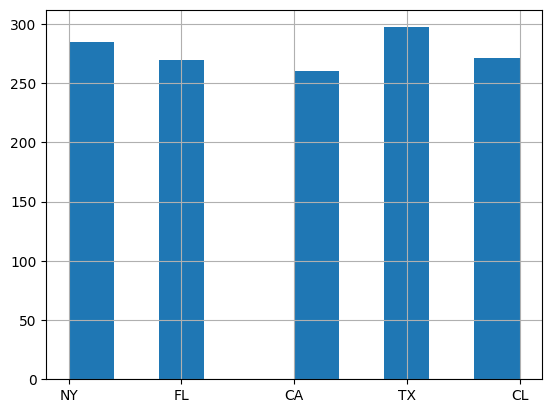

In [66]:
data["District"].hist()

Oder ein Histogramm mit den einzelnen vertelefonierten Sekunden:

<AxesSubplot: >

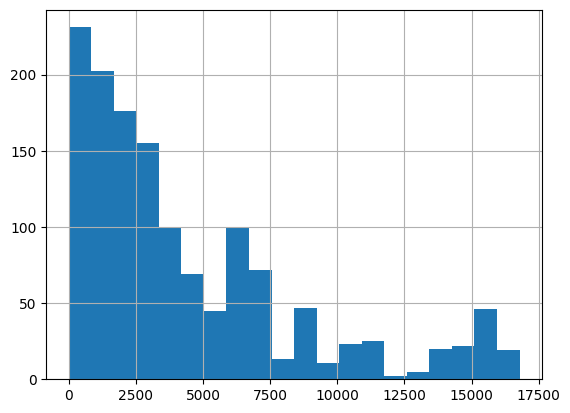

In [67]:
data["Seconds of Use"].hist(bins=20)

Oder auch mit einfachen Barplots und den ersten 20 Daten

<AxesSubplot: title={'center': 'Die ersten 20 Daten'}>

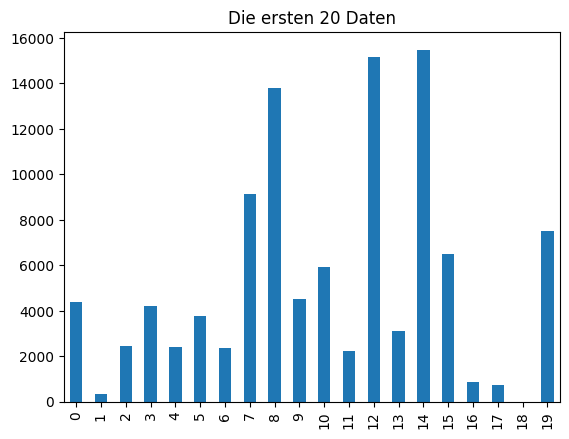

In [68]:
data["Seconds of Use"].iloc[:20].plot(kind="bar", title="Die ersten 20 Daten")

Wir sehen, wir haben die ganzen Möglichkeiten zum Beeinflussen und gestalten des Plots, welche wir aus Matploitlib auch kennen.

Um etwas genauer zu spezifizieren, was wir wie aus dem Datenset plotten wollen, können wir folgendes machen:

<AxesSubplot: >

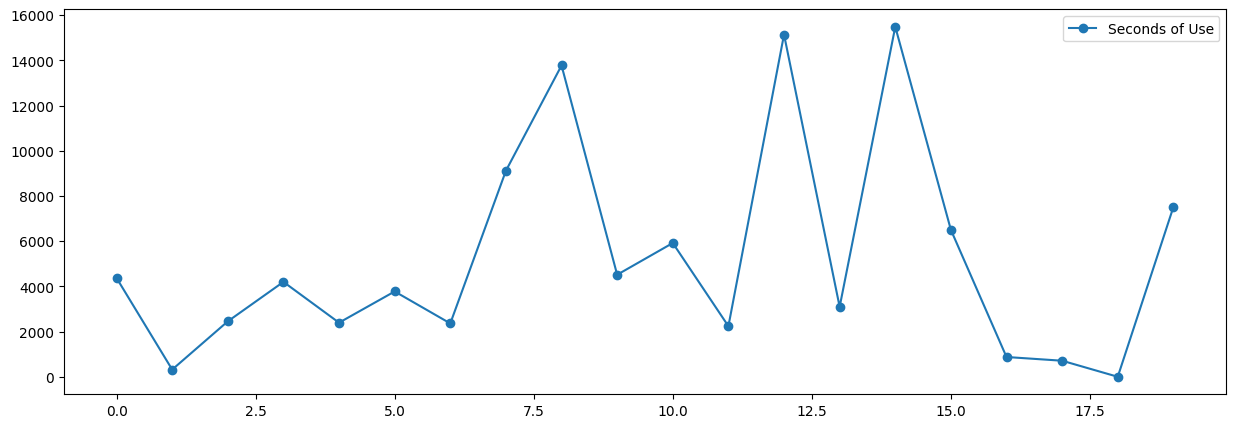

In [69]:
data[:20].plot(y="Seconds of Use", kind="line", marker="o", figsize=(15,5))

Hier habe ich bisweilen noch keinen Parameter gefunden, der die X-Ticks auf 1 setzt. Daher behelfsmäßig mit dem marker Parameter die Erkennbarkeit steigern. Wenn man es ganz sauber mag (Und die Extrameile unbedingt gehen will):

<AxesSubplot: xlabel='Index'>

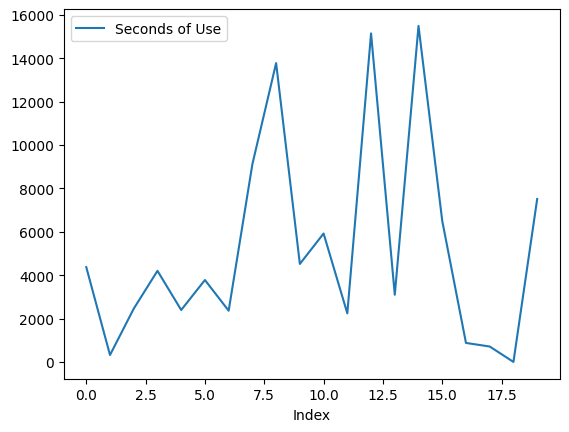

In [70]:
my_subset = data[:20].copy()
my_subset["Index"] = my_subset.index.values
my_subset.plot(kind="line", x="Index", y="Seconds of Use")

Wir können auch übereinander gelagerte Plots generieren, indem wir einfach 2 oder mehrmals den gleichen Typ in der gleichen Größe plotten. Mit dem Argument xrot können wir bestimmen, wie stark geneigt die Beschriftungen der X Achse sein sollen. Für die Y Ache ist es dementsprechend yrot.

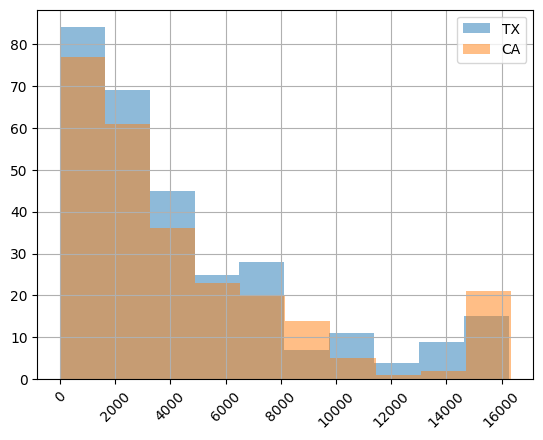

In [71]:
data[data["District"]=="TX"]["Seconds of Use"].hist(xrot=45, alpha=.5)
data[data["District"]=="CA"]["Seconds of Use"].hist(xrot=45, alpha=.5)
plt.legend(["TX", "CA"])

Gehen wir zur Handhabung von fehlenden Werten über. Zunächst fabrizieren wir willkürlich welche in der Spalte "Distinct Called Numbers" NaN Werte

In [72]:
data["Distinct Called Numbers"] = data["Distinct Called Numbers"].mask(np.random.random(data["Distinct Called Numbers"].shape) < .1)

C:\Users\Keno\AppData\Local\Temp\ipykernel_21584\949478741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Distinct Called Numbers"] = data["Distinct Called Numbers"].mask(np.random.random(data["Distinct Called Numbers"].shape) < .1)


Schauen wir uns nun an, welche Spalten NaN Werte aufweisen.

In [73]:
data.isna().any()

Call Failure               False
Complains                  False
Subscription Length        False
Charge Amount              False
Seconds of Use             False
Frequency of use           False
Frequency of SMS           False
Distinct Called Numbers     True
Age Group                  False
Tariff Plan                False
Status                     False
Age                        False
Customer Value             False
Churn                      False
Phone Heavy User           False
SMS Heavy User             False
Heavy User                 False
Main Cell                  False
District                   False
Cust Cluster               False
dtype: bool

Schauen wir uns einmal die Häufigkeit an

In [74]:
data.isna().sum()

Call Failure                 0
Complains                    0
Subscription Length          0
Charge Amount                0
Seconds of Use               0
Frequency of use             0
Frequency of SMS             0
Distinct Called Numbers    131
Age Group                    0
Tariff Plan                  0
Status                       0
Age                          0
Customer Value               0
Churn                        0
Phone Heavy User             0
SMS Heavy User               0
Heavy User                   0
Main Cell                    0
District                     0
Cust Cluster                 0
dtype: int64

Grafisch:

<AxesSubplot: >

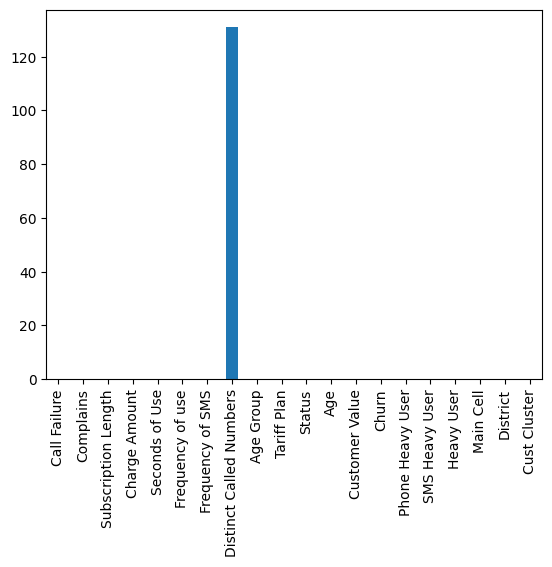

In [75]:
data.isna().sum().plot(kind="bar")

Hier eine kleine Beweisführung in der betreffenden Spalte :) :

In [76]:
data

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn,Phone Heavy User,SMS Heavy User,Heavy User,Main Cell,District,Cust Cluster
0,8,0,38,0,4370,71,5,17.0,3,1,1,30,197.64,0,True,False,False,1046,NY,1
1,0,0,39,0,318,5,7,4.0,2,1,2,25,46.035,0,False,False,False,182,FL,1
2,10,0,37,0,2453,60,359,24.0,3,1,1,30,1536.52,0,False,True,False,344,CA,1
3,10,0,38,0,4198,66,1,35.0,1,1,1,15,240.02,0,True,False,False,3075,TX,3
4,3,0,38,0,2393,58,2,33.0,1,1,1,15,145.805,0,False,False,False,1407,TX,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,18,0,37,7,10310,95,5,45.0,4,2,1,45,272.625,0,True,False,False,1722,NY,3
1424,10,0,37,0,5693,100,30,27.0,2,1,1,25,395.685,1,True,False,False,3056,CL,5
1425,0,0,35,0,2715,24,4,17.0,3,1,1,30,125.56,0,True,False,False,1620,TX,5
1426,6,1,36,0,2865,43,13,19.0,2,1,2,25,189.36,1,True,False,False,2324,FL,4


Wir haben 2 Optionen, wie wir mit NaN Werten verfahren. (Wer weiß es?)
1. Die betroffenen Zeilen löschen
2. Die betroffenen Elemente mit dem Median auffüllen

Option 1: Die betroffenen Zeilen löschen.

In [77]:
data2 = data.copy()
data2 = data2.dropna()
data2

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn,Phone Heavy User,SMS Heavy User,Heavy User,Main Cell,District,Cust Cluster
0,8,0,38,0,4370,71,5,17.0,3,1,1,30,197.64,0,True,False,False,1046,NY,1
1,0,0,39,0,318,5,7,4.0,2,1,2,25,46.035,0,False,False,False,182,FL,1
2,10,0,37,0,2453,60,359,24.0,3,1,1,30,1536.52,0,False,True,False,344,CA,1
3,10,0,38,0,4198,66,1,35.0,1,1,1,15,240.02,0,True,False,False,3075,TX,3
4,3,0,38,0,2393,58,2,33.0,1,1,1,15,145.805,0,False,False,False,1407,TX,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,18,0,37,7,10310,95,5,45.0,4,2,1,45,272.625,0,True,False,False,1722,NY,3
1424,10,0,37,0,5693,100,30,27.0,2,1,1,25,395.685,1,True,False,False,3056,CL,5
1425,0,0,35,0,2715,24,4,17.0,3,1,1,30,125.56,0,True,False,False,1620,TX,5
1426,6,1,36,0,2865,43,13,19.0,2,1,2,25,189.36,1,True,False,False,2324,FL,4


Wir sehen: 152 Zeilen wurden gelöscht. Eine erneute Probe ergibt:

In [78]:
data2.isna().any()

Call Failure               False
Complains                  False
Subscription Length        False
Charge Amount              False
Seconds of Use             False
Frequency of use           False
Frequency of SMS           False
Distinct Called Numbers    False
Age Group                  False
Tariff Plan                False
Status                     False
Age                        False
Customer Value             False
Churn                      False
Phone Heavy User           False
SMS Heavy User             False
Heavy User                 False
Main Cell                  False
District                   False
Cust Cluster               False
dtype: bool

Option 2: Die NaN Werte mit dem Median füllen

In [79]:
#Um den Rechenaufwand zu verringern
dcn_median = data["Distinct Called Numbers"].median()

data["Distinct Called Numbers"] = data["Distinct Called Numbers"].fillna(dcn_median)
data

C:\Users\Keno\AppData\Local\Temp\ipykernel_21584\4185108821.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Distinct Called Numbers"] = data["Distinct Called Numbers"].fillna(dcn_median)


,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn,Phone Heavy User,SMS Heavy User,Heavy User,Main Cell,District,Cust Cluster
0,8,0,38,0,4370,71,5,17.0,3,1,1,30,197.64,0,True,False,False,1046,NY,1
1,0,0,39,0,318,5,7,4.0,2,1,2,25,46.035,0,False,False,False,182,FL,1
2,10,0,37,0,2453,60,359,24.0,3,1,1,30,1536.52,0,False,True,False,344,CA,1
3,10,0,38,0,4198,66,1,35.0,1,1,1,15,240.02,0,True,False,False,3075,TX,3
4,3,0,38,0,2393,58,2,33.0,1,1,1,15,145.805,0,False,False,False,1407,TX,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,18,0,37,7,10310,95,5,45.0,4,2,1,45,272.625,0,True,False,False,1722,NY,3
1424,10,0,37,0,5693,100,30,27.0,2,1,1,25,395.685,1,True,False,False,3056,CL,5
1425,0,0,35,0,2715,24,4,17.0,3,1,1,30,125.56,0,True,False,False,1620,TX,5
1426,6,1,36,0,2865,43,13,19.0,2,1,2,25,189.36,1,True,False,False,2324,FL,4


Zum Schluss schauen wir, wie wir kategorische Daten für maschienelles Lernen verwendbar machen. Dafür nehmen wir einen Column-Melt vor. Wir legen für jede Kategorie eine Spalte mit einem boolschen Indikator für jede solche an. Auch müssen wir die Spalten als solche mit boolschen Werten konfigurieren. Des Weiteren ergänzen wir die Spaltennamen mit einem Präfix. In diesem Fall "is_".

In [80]:
extract = data["District"].str.get_dummies()
extract.columns = ["is_" + col for col in extract.columns]
extract = extract.astype(bool)
extract

,is_CA,is_CL,is_FL,is_NY,is_TX
0,False,False,False,True,False
1,False,False,True,False,False
2,True,False,False,False,False
3,False,False,False,False,True
4,False,False,False,False,True
...,...,...,...,...,...
1423,False,False,False,True,False
1424,False,True,False,False,False
1425,False,False,False,False,True
1426,False,False,True,False,False


Am Ende nur noch mit pd.concatenate mergen. Concat ist eine Funktion von Pandas, in welcher Datenframes (oder auch Series) miteinander gemerged werden können. Bei einem Spaltenmerge, vergesst nicht den Parameter axis=1 anzugeben.

In [81]:
data = pd.concat([data, extract], axis=1)
data

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,...,SMS Heavy User,Heavy User,Main Cell,District,Cust Cluster,is_CA,is_CL,is_FL,is_NY,is_TX
0,8,0,38,0,4370,71,5,17.0,3,1,...,False,False,1046,NY,1,False,False,False,True,False
1,0,0,39,0,318,5,7,4.0,2,1,...,False,False,182,FL,1,False,False,True,False,False
2,10,0,37,0,2453,60,359,24.0,3,1,...,True,False,344,CA,1,True,False,False,False,False
3,10,0,38,0,4198,66,1,35.0,1,1,...,False,False,3075,TX,3,False,False,False,False,True
4,3,0,38,0,2393,58,2,33.0,1,1,...,False,False,1407,TX,4,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,18,0,37,7,10310,95,5,45.0,4,2,...,False,False,1722,NY,3,False,False,False,True,False
1424,10,0,37,0,5693,100,30,27.0,2,1,...,False,False,3056,CL,5,False,True,False,False,False
1425,0,0,35,0,2715,24,4,17.0,3,1,...,False,False,1620,TX,5,False,False,False,False,True
1426,6,1,36,0,2865,43,13,19.0,2,1,...,False,False,2324,FL,4,False,False,True,False,False


Im Anwendungsfall für ML, würde der bestehende Daten Frame kopiert werden und die "District" Spalte entfernt, aus Gründen der Sauberkeit und Best Practise für ML.

In [82]:
ml_data = data.copy()
ml_data = ml_data.drop("District", axis=1)
ml_data

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,...,Phone Heavy User,SMS Heavy User,Heavy User,Main Cell,Cust Cluster,is_CA,is_CL,is_FL,is_NY,is_TX
0,8,0,38,0,4370,71,5,17.0,3,1,...,True,False,False,1046,1,False,False,False,True,False
1,0,0,39,0,318,5,7,4.0,2,1,...,False,False,False,182,1,False,False,True,False,False
2,10,0,37,0,2453,60,359,24.0,3,1,...,False,True,False,344,1,True,False,False,False,False
3,10,0,38,0,4198,66,1,35.0,1,1,...,True,False,False,3075,3,False,False,False,False,True
4,3,0,38,0,2393,58,2,33.0,1,1,...,False,False,False,1407,4,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,18,0,37,7,10310,95,5,45.0,4,2,...,True,False,False,1722,3,False,False,False,True,False
1424,10,0,37,0,5693,100,30,27.0,2,1,...,True,False,False,3056,5,False,True,False,False,False
1425,0,0,35,0,2715,24,4,17.0,3,1,...,True,False,False,1620,5,False,False,False,False,True
1426,6,1,36,0,2865,43,13,19.0,2,1,...,True,False,False,2324,4,False,False,True,False,False


Good to know: Die .loc[] Methode

Solltet Ihr den Fall haben, dass Ihr aus einer Spalte Werte extrahieren wollt auf Basis von Werten in einer anderen Spalte, könnt Ihr die .loc[] Methode verwenden, dessen Syntax .loc[SUCHBEDINGUNG, ANZUZEIGENE SPALTE(N)] Wenn mehrere Spalten oder Suchbedingungen als Übergabe eingebracht werden sollen, kann dies mithilfe von () passieren. Hier ein Beispiel Snippet:

In [ ]:
data.loc[(data["Cust Cluster"] == 1) & (data["Frequency of use"] % 2 == 0), ("Seconds of Use", "Complains")]

Wenn sich der Kunde im 1. Cluster befindet UND die Nutzungshäufigkeit eine Gerade Zahl ist, zeige die Nutzung des Tarifs in Sekunden und die Anzahl der eingereichten Beschwerden des Kunden.

Als Finale können wir den DatenFrame in unterschiedliche Formate Exportieren:

In [ ]:
#data.to_csv("alternated_mobile_data.csv")

Geheimtipp: Ihr könnt einen DataFrame für die spätere Verwendung auch selbst exportieren.
Für maximale OS Kompatibilität: Nehmt CSV!
Für maximale Python Kompatibilität: Nehmt Pickle!
Für schnellste Reaktionszeiten: Nehmt Feathers! (Zunächst das Paket "pyarrow" installieren)
Für maximale Speichereffizienz: Nehmt Parquet! (Zunächst das Paket "pyarrow" oder "fastparquet" installieren)

In [ ]:
#data.to_pickle("alternated_mobile_data.pickle")

In [ ]:
# Um den Index error zu reparieren
#data2 = data.reset_index(drop=True)
#data2.to_feather("alternated_mobile_data.feathers")

In [ ]:
#data.to_parquet("alternated_mobile_data.parquet")